My project uses a Video Game dataset from Kaggle. [Here is the link to it.](https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset) The data inside was retrieved from two webscrapes: one from VGChartz Video Games Sales, and another from Metacritic, which provides the games' ratings. The first 10 features of the csv are from VGChartz and the last 6 are from Metacritic.

In [110]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv('/Users/nikailambert/Desktop/DATA1030/DATA1030-Project/data/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [111]:
df.drop(columns=['Name'],inplace=True)
y = df['Global_Sales']
df.drop(columns=['Global_Sales'],inplace=True)
#df.drop(columns=['Publisher'],inplace=True)
# the unprocessed feature matrix
X = df
print(X.shape)
# the feature names
ftrs = df.columns
print(ftrs)

(16719, 14)
Index(['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


In [112]:
a = df['Publisher'].value_counts()


df['Publisher'] = np.where(df['Publisher'].isin(a.index[a >= 100]), df['Publisher'], 'Other')

df['Publisher'].value_counts()

Other                                     4589
Electronic Arts                           1356
Activision                                 985
Namco Bandai Games                         939
Ubisoft                                    933
Konami Digital Entertainment               834
THQ                                        715
Nintendo                                   706
Sony Computer Entertainment                687
Sega                                       638
Take-Two Interactive                       422
Capcom                                     386
Atari                                      367
Tecmo Koei                                 348
Warner Bros. Interactive Entertainment     235
Square Enix                                234
Disney Interactive Studios                 218
Unknown                                    201
Midway Games                               198
Eidos Interactive                          198
Microsoft Game Studios                     191
505 Games    

In [113]:
df['Developer'] = df['Developer'].fillna('placeholder')

x = df['Developer'].value_counts()

df['Developer'] = np.where(df['Developer'].isin(x.index[x >= 30]), df['Developer'], 'Other')

df['Developer'] = df['Developer'].replace(
    to_replace=['placeholder'], 
    value=np.nan)

df['Developer'].value_counts()[:50]

Other                             6896
Ubisoft                            204
EA Sports                          172
EA Canada                          167
Konami                             162
Capcom                             139
EA Tiburon                         108
Electronic Arts                    104
Ubisoft Montreal                   101
Visual Concepts                     99
Omega Force                         80
Traveller's Tales                   77
Vicarious Visions                   76
Activision                          75
TT Games                            73
Nintendo                            72
THQ                                 71
Namco                               64
Codemasters                         62
Artificial Mind and Movement        61
Midway                              60
Yuke's                              59
Harmonix Music Systems              56
High Voltage Software               55
Maxis                               49
Square Enix              

In [103]:
print(df.shape)
num_rows = len(df.index)
num_cols = len(df.columns)
print('There are ' + str(num_rows) + ' rows and ' + str(num_cols) + ' columns in this dataset.')
df.count()

(16719, 14)
There are 16719 rows and 14 columns in this dataset.


Platform           16719
Year_of_Release    16450
Genre              16717
Publisher          16719
NA_Sales           16719
EU_Sales           16719
JP_Sales           16719
Other_Sales        16719
Critic_Score        8137
Critic_Count        8137
User_Score          7590
User_Count          7590
Developer          10096
Rating              9950
dtype: int64

In [104]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,98.000000,113.000000,9.700000,10665.000000


The maximum value of my target variable (global sales) is 82.53. This value belongs to Wii Sports, which as of 2017, has sold over 82 million copies (https://en.wikipedia.org/wiki/Wii_Sports). When dealing with this variable and reporting stuff from it, I should multiply it by 1,000,000, or else it'll look like the best selling video game has only 82 sales.

When looking at the description of our target variable, the minimum value is 0.01 and the mean is around .0533. This is really far from our maximum and while looking at the data, I've noticed that only 2076 of our rows have values greater than or equal to one. I guess not too many games sell millions of copies.

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         16719 non-null  object 
 1   Year_of_Release  16450 non-null  float64
 2   Genre            16717 non-null  object 
 3   Publisher        16719 non-null  object 
 4   NA_Sales         16719 non-null  float64
 5   EU_Sales         16719 non-null  float64
 6   JP_Sales         16719 non-null  float64
 7   Other_Sales      16719 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   Critic_Count     8137 non-null   float64
 10  User_Score       7590 non-null   float64
 11  User_Count       7590 non-null   float64
 12  Developer        10096 non-null  object 
 13  Rating           9950 non-null   object 
dtypes: float64(9), object(5)
memory usage: 1.8+ MB


A lot of my data is float numbers and the others are objects. The float numbers relate to the Year of Release, Sales, and Critic/User scores of the games. The objects are strings that record the Names of the games, Platform, Genre, etc.

In [106]:
for i in range(len(df.columns)):
    missing_data = df[df.columns[i]].isna().sum()
    perc = missing_data / len(df) * 100
    print('index: ' + str(i) + ',', 'missing data entries: ' + str(missing_data)+ ',',\
          'percentage of missing data: ' + str(perc))

index: 0, missing data entries: 0, percentage of missing data: 0.0
index: 1, missing data entries: 269, percentage of missing data: 1.60894790358275
index: 2, missing data entries: 2, percentage of missing data: 0.011962437944853162
index: 3, missing data entries: 0, percentage of missing data: 0.0
index: 4, missing data entries: 0, percentage of missing data: 0.0
index: 5, missing data entries: 0, percentage of missing data: 0.0
index: 6, missing data entries: 0, percentage of missing data: 0.0
index: 7, missing data entries: 0, percentage of missing data: 0.0
index: 8, missing data entries: 8582, percentage of missing data: 51.33082122136492
index: 9, missing data entries: 8582, percentage of missing data: 51.33082122136492
index: 10, missing data entries: 9129, percentage of missing data: 54.60254799928226
index: 11, missing data entries: 9129, percentage of missing data: 54.60254799928226
index: 12, missing data entries: 6623, percentage of missing data: 39.61361325438124
index: 13

It looks like there are more data points regarding to the games' Name, Platform, Year of Release, Genre, Publisher, NA/EU/JP/Other/Global Sales. 

Most of the missing data here is focused in the last 6 columns, which are mostly the Metacritic ratings, where 39-55% of the data is missing. Excluding column indexes 4 and 14, these missing values are all continuous features.

A potential cause for this missing data is that older games would lack reviews since gaming culture wasn't as big, and also, less popular games are likely to be reviewed because no one is really playing them :(

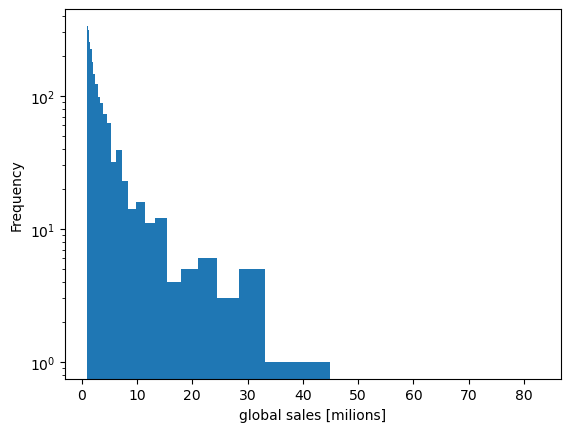

In [38]:
y.plot.hist(log=True, bins = np.logspace(np.log10(1),np.log10(np.max(y)),30))
#30, 20
plt.xlabel('global sales [milions]')
plt.rc('font', size=12) 


Our histogram of the target variable shows this, as a majority of our values are closer to 0.

In [39]:
df[y<1]

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2076,XB,2000.0,Sports,Microsoft Game Studios,0.74,0.21,0.00,0.04,79.0,24.0,8.5,10.0,Other,E
2077,X360,2013.0,Misc,Ubisoft,0.72,0.17,0.00,0.10,79.0,16.0,7.8,33.0,Ubisoft,E10+
2078,X360,2011.0,Sports,Electronic Arts,0.94,0.00,0.00,0.06,82.0,25.0,6.6,49.0,EA Sports,E
2079,GC,2003.0,Racing,Vivendi Games,0.77,0.20,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN
2080,X360,2012.0,Action,THQ,0.72,0.20,0.00,0.08,85.0,60.0,7.6,88.0,Yuke's,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN
16715,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
16716,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN
16717,GBA,2003.0,Platform,Other,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN


There are a lot of entries that are under 1 million sales.

<AxesSubplot:>

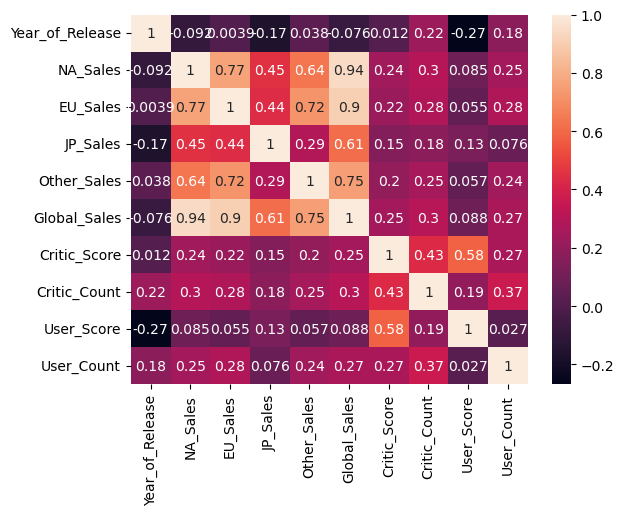

In [62]:
df2 = df.dropna(subset=['Name', 'Year_of_Release', 'Genre', 'Publisher'])
df_num_corr = df2.corr()
sb.heatmap(df_num_corr, annot = True)

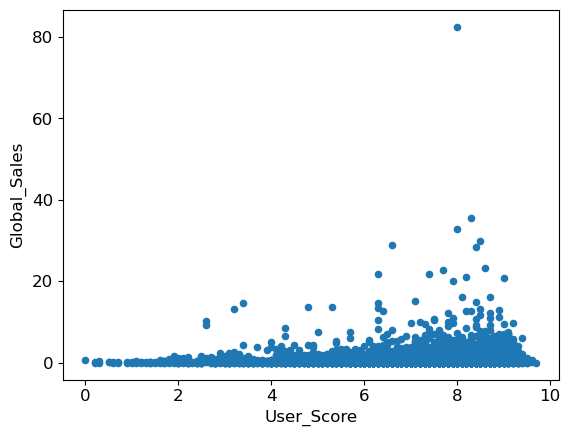

In [23]:
df.plot.scatter('User_Score','Global_Sales')
plt.rc('font', size=12) 


#log transform y axis
plt.show()

The graph here shows that there is somewhat of a correlation between the User Scores of a game and a game's Global Sales. Perhaps if we zoom in, the correlation can be made clearer

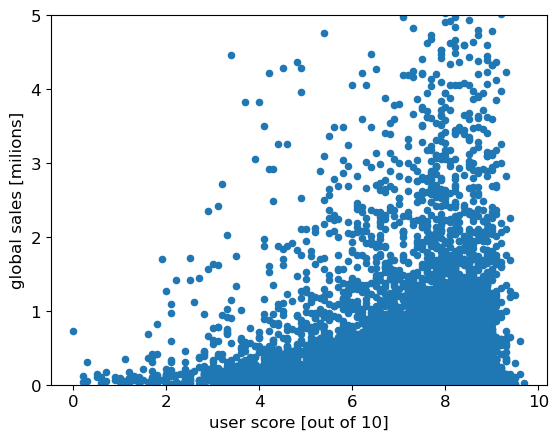

In [25]:
df.plot.scatter('User_Score','Global_Sales',ylim=(0,5))
plt.ylabel('global sales [milions]')
plt.xlabel('user score [out of 10]')

plt.rc('font', size=12) 

plt.show()

By limiting our Global_Sales to 5 (5 million), we can see thay as the User_Score increases, the Global_Sales increase. Of course, if more people like the game, then it will sell better.

In [114]:
onehot_ftrs = ['Platform','Publisher', 'Genre', 'Developer', 'Rating']
standard_scale_ftrs = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',\
                       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

In [115]:
preprocessor = ColumnTransformer(
    transformers =[
        ('oneHot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), standard_scale_ftrs)])
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [117]:
import xgboost
from sklearn.model_selection import train_test_split

from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")

nr_states = 5
best_models = []
test_scores = np.zeros(nr_states)
test_sets = []

XGB = xgboost.XGBRegressor()

for i in range(nr_states):
    print('-----------------------------------------------------')
    print('random state ' + str(i))
    
    X_train,X_other,y_train,y_other = train_test_split(X,y,train_size = 0.6,random_state = 59*i)
    X_test, X_CV, y_test, y_CV = train_test_split(X_other,y_other,train_size = 0.5,random_state = 59*i)


    X_train_prep = preprocessor.fit_transform(X_train)
    feature_names = preprocessor.get_feature_names_out()
    df_train = pd.DataFrame(data=X_train_prep,columns=feature_names)
    print(df_train.shape)

    X_CV_prep = preprocessor.transform(X_CV)
    df_CV = pd.DataFrame(data=X_CV_prep,columns = feature_names)
    print(df_CV.shape)

    X_test_prep = preprocessor.transform(X_test)
    df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
    print(df_test.shape)
    
    grid = []
    train_RMSE = np.zeros(len(pg))
    val_RMSE = np.zeros(len(pg))
    
    param_grid = {"learning_rate": [.03, 0.05, 0.10, 0.20, 0.2],
              "n_estimators": [10000],
              "seed": [59*i],
              "eval_metric": ['rmse'],
              "missing": [np.nan],
              "max_depth": [1,3,10,30,100],
              "colsample_bytree": [0.9],
              "subsample": [0.66]}

    pg = ParameterGrid(param_grid)
    
    for k in range(len(pg)):
        params = pg[k]
        #print('   ',params)
        XGB.set_params(**params,use_label_encoder=False,random_state=59*i)
        eval_set = [(df_CV.to_numpy(), y_CV.to_numpy())]
        XGB.fit(X=df_train.to_numpy(), y=y_train.to_numpy(), early_stopping_rounds=50,eval_set=eval_set,\
                verbose=False,eval_metric="rmse")
        grid.append(XGB)
        y_CV_pred = XGB.predict(df_CV.to_numpy())
        y_train_pred = XGB.predict(df_train.to_numpy())
        train_RMSE[k] = np.sqrt(mean_squared_error(y_train,y_train_pred))
        val_RMSE[k] = np.sqrt(mean_squared_error(y_CV,y_CV_pred))
        #print('   ',train_RMSE[k],val_RMSE[k])
        
    best_models.append(grid[np.argmax(val_RMSE)])
    
    y_pred = best_models[-1].predict(df_test.to_numpy())
    
    test_scores[i] = np.sqrt(mean_squared_error(y_test,y_pred))
    
    test_sets.append([df_test,y_test])
    
    print('best parameters:', pg[np.argmax(val_RMSE)], 'the matching test score is: ', test_scores[i])
    print('validation score:',np.max(val_RMSE))
    print('train score:',np.max(train_RMSE))    
    
print('mean and std of test scores: ')

XGBoost_mean = np.mean(test_scores)
XGBoost_std = np.std(test_scores)

print(XGBoost_mean,XGBoost_std)

-----------------------------------------------------
random state 0
(10031, 140)
(3344, 140)
(3344, 140)
best parameters: {'subsample': 0.66, 'seed': 0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 1, 'learning_rate': 0.2, 'eval_metric': 'rmse', 'colsample_bytree': 0.9} the matching test score is:  0.18939049650755363
validation score: 0.16530302895565885
train score: 0.0667178996470841
-----------------------------------------------------
random state 1
(10031, 140)
(3344, 140)
(3344, 140)
best parameters: {'subsample': 0.66, 'seed': 59, 'n_estimators': 10000, 'missing': nan, 'max_depth': 100, 'learning_rate': 0.2, 'eval_metric': 'rmse', 'colsample_bytree': 0.9} the matching test score is:  0.7504678076773226
validation score: 0.15585720157374783
train score: 0.08130951414803517
-----------------------------------------------------
random state 2
(10031, 141)
(3344, 141)
(3344, 141)
best parameters: {'subsample': 0.66, 'seed': 118, 'n_estimators': 10000, 'missing': nan, 'max_d

In [59]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

X_train,X_other,y_train,y_other = train_test_split(X,y,train_size = 0.6,random_state = 59)
X_test, X_CV, y_test, y_CV = train_test_split(X_other,y_other,train_size = 0.5,random_state = 59)

X_train_prep = preprocessor.fit_transform(X_train)
feature_names = preprocessor.get_feature_names_out()
df_train = pd.DataFrame(data=X_train_prep,columns = feature_names)
print('training set: ',df_train.shape)

X_CV_prep = preprocessor.transform(X_CV)
df_CV = pd.DataFrame(data=X_CV_prep,columns = feature_names)
print('CV: ',df_CV.shape)

X_test_prep = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
print('test set: ',df_test.shape)
    
imputer = IterativeImputer(estimator = RandomForestRegressor(n_estimators=1), random_state=42)
X_impute = imputer.fit_transform(df_train)
df_train_imp = pd.DataFrame(data=X_impute, columns = df_train.columns)
df_CV_imp = pd.DataFrame(data=imputer.transform(df_CV), columns = df_train.columns)
df_test_imp = pd.DataFrame(data=imputer.transform(df_test), columns = df_train.columns)

training set:  (10031, 140)
CV:  (3344, 140)
test set:  (3344, 140)


In [118]:
for i in range(nr_states):
    print('-----------------------------------------------------')
    print('random state ' + str(i))
    
    X_train,X_other,y_train,y_other = train_test_split(X,y,train_size = 0.6,random_state = 59*i)
    X_test, X_CV, y_test, y_CV = train_test_split(X_other,y_other,train_size = 0.5,random_state = 59*i)

    X_train_prep = preprocessor.fit_transform(X_train)
    feature_names = preprocessor.get_feature_names_out()
    df_train = pd.DataFrame(data=X_train_prep,columns = feature_names)
    print(df_train.shape)

    X_CV_prep = preprocessor.transform(X_CV)
    df_CV = pd.DataFrame(data=X_CV_prep,columns = feature_names)
    print(df_CV.shape)

    X_test_prep = preprocessor.transform(X_test)
    df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
    print(df_test.shape)

    imputer = IterativeImputer(estimator = RandomForestRegressor(n_estimators=1), random_state=59*i)
    X_impute = imputer.fit_transform(df_train)
    df_train_imp = pd.DataFrame(data=X_impute, columns = df_train.columns)
    df_CV_imp = pd.DataFrame(data=imputer.transform(df_CV), columns = df_train.columns)
    df_test_imp = pd.DataFrame(data=imputer.transform(df_test), columns = df_train.columns)
    
    param_grid = {"learning_rate": [.03, 0.05, 0.10, 0.20, 0.2],
                  "n_estimators": [10000],
                  "seed": [59*i],
                  "eval_metric": ['rmse'],
                  "missing": [np.nan],
                  "max_depth": [1,3,10,30,100],
                  "colsample_bytree": [0.9],
                  "subsample": [0.66]}

    pg = ParameterGrid(param_grid)
    
    grid = []
    train_RMSE = np.zeros(len(pg))
    val_RMSE = np.zeros(len(pg))
    
    for k in range(len(pg)):
        params = pg[k]
        #print('   ',params)
        XGB.set_params(**params,use_label_encoder=False,random_state=59*i)
        eval_set = [(df_CV_imp.to_numpy(), y_CV.to_numpy())]
        XGB.fit(X=df_train_imp.to_numpy(), y=y_train.to_numpy(), early_stopping_rounds=50,eval_set=eval_set,\
                verbose=False,eval_metric="rmse")
        grid.append(XGB)
        y_CV_pred = XGB.predict(df_CV_imp.to_numpy())
        y_train_pred = XGB.predict(df_train_imp.to_numpy())
        train_RMSE[k] = np.sqrt(mean_squared_error(y_train,y_train_pred))
        val_RMSE[k] = np.sqrt(mean_squared_error(y_CV,y_CV_pred))
        #print('   ',train_RMSE[k],val_RMSE[k])
        
    best_models.append(grid[np.argmax(val_RMSE)])
    
    y_pred = best_models[-1].predict(df_test_imp.to_numpy())
    
    test_scores[i] = np.sqrt(mean_squared_error(y_test,y_pred))
    
    test_sets.append([df_test_imp,y_test])
    
    print('best parameters:', pg[np.argmax(val_RMSE)], 'the matching test score is: ', test_scores[i])
    print('validation score:',np.max(val_RMSE))
    print('train score:',np.max(train_RMSE))    
    
print('mean and std of test scores: ')

XGBoost_imp_mean = np.mean(test_scores)
XGBoost_imp_std = np.std(test_scores)

print(XGBoost_imp_mean,XGBoost_imp_std)

-----------------------------------------------------
random state 0
(10031, 140)
(3344, 140)
(3344, 140)
best parameters: {'subsample': 0.66, 'seed': 0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 1, 'learning_rate': 0.2, 'eval_metric': 'rmse', 'colsample_bytree': 0.9} the matching test score is:  0.14587084791112007
validation score: 0.19214916791181275
train score: 0.09107289336521322
-----------------------------------------------------
random state 1
(10031, 140)
(3344, 140)
(3344, 140)
best parameters: {'subsample': 0.66, 'seed': 59, 'n_estimators': 10000, 'missing': nan, 'max_depth': 100, 'learning_rate': 0.2, 'eval_metric': 'rmse', 'colsample_bytree': 0.9} the matching test score is:  0.770840864583754
validation score: 0.14920034629939513
train score: 0.06863411213295095
-----------------------------------------------------
random state 2
(10031, 141)
(3344, 141)
(3344, 141)
best parameters: {'subsample': 0.66, 'seed': 118, 'n_estimators': 10000, 'missing': nan, 'max_d

In [119]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
import warnings

from sklearn.linear_model import LinearRegression, Ridge, Lasso

#lasso

best_models = []
test_scores = np.zeros(nr_states)
test_sets = []

param_grid =  {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2],
               'max_iter': [100000]}

pg = ParameterGrid(param_grid)


for i in range(nr_states):
    print('-----------------------------------------------------')
    print('random state ' + str(i))
    
    X_train,X_other,y_train,y_other = train_test_split(X,y,train_size = 0.6,random_state = 59*i)
    X_test, X_CV, y_test, y_CV = train_test_split(X_other,y_other,train_size = 0.5,random_state = 59*i)

    X_train_prep = preprocessor.fit_transform(X_train)
    feature_names = preprocessor.get_feature_names_out()
    df_train = pd.DataFrame(data=X_train_prep,columns = feature_names)
    print(df_train.shape)

    X_CV_prep = preprocessor.transform(X_CV)
    df_CV = pd.DataFrame(data=X_CV_prep,columns = feature_names)
    print(df_CV.shape)

    X_test_prep = preprocessor.transform(X_test)
    df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
    print(df_test.shape)

    imputer = IterativeImputer(estimator = RandomForestRegressor(n_estimators=1), random_state=59*i)
    X_impute = imputer.fit_transform(df_train)
    df_train_imp = pd.DataFrame(data=X_impute, columns = df_train.columns)
    df_CV_imp = pd.DataFrame(data=imputer.transform(df_CV), columns = df_train.columns)
    df_test_imp = pd.DataFrame(data=imputer.transform(df_test), columns = df_train.columns)
    
    grid = []
    train_RMSE = np.zeros(len(pg))
    val_RMSE = np.zeros(len(pg))
    
    for k in range(len(pg)):
        params = pg[k]
        print('   ', params)
        lin_reg = Lasso(**params,random_state=59*i)
        lin_reg.fit(df_train_imp,y_train)
        grid.append(lin_reg)
        y_CV_pred = lin_reg.predict(df_CV_imp.to_numpy())
        y_train_pred = lin_reg.predict(df_train_imp.to_numpy())
        train_RMSE[k] = np.sqrt(mean_squared_error(y_train,y_train_pred))
        val_RMSE[k] = np.sqrt(mean_squared_error(y_CV,y_CV_pred))
    best_models.append(grid[np.argmax(val_RMSE)])
    
    y_pred = best_models[-1].predict(df_test_imp.to_numpy())
    
    test_scores[i] = np.sqrt(mean_squared_error(y_test,y_pred))
    
    test_sets.append([df_test_imp,y_test])
    
    print('best parameters:', pg[np.argmax(val_RMSE)], 'the matching test score is: ', test_scores[i])
    print('validation score:',np.max(val_RMSE))
    print('train score:',np.max(train_RMSE))    
    
print('mean and std of test scores: ')

lasso_mean = np.mean(test_scores)
lasso_std = np.std(test_scores)

print(lasso_mean,lasso_std)

-----------------------------------------------------
random state 0
(10031, 140)
(3344, 140)
(3344, 140)
    {'max_iter': 100000, 'alpha': 0.0001}
    {'max_iter': 100000, 'alpha': 0.001}
    {'max_iter': 100000, 'alpha': 0.01}
    {'max_iter': 100000, 'alpha': 0.1}
    {'max_iter': 100000, 'alpha': 1.0}
    {'max_iter': 100000, 'alpha': 10.0}
    {'max_iter': 100000, 'alpha': 100.0}
best parameters: {'max_iter': 100000, 'alpha': 10.0} the matching test score is:  1.336797717475805
validation score: 1.387553894211712
train score: 1.6601499663477208
-----------------------------------------------------
random state 1
(10031, 140)
(3344, 140)
(3344, 140)
    {'max_iter': 100000, 'alpha': 0.0001}
    {'max_iter': 100000, 'alpha': 0.001}
    {'max_iter': 100000, 'alpha': 0.01}
    {'max_iter': 100000, 'alpha': 0.1}
    {'max_iter': 100000, 'alpha': 1.0}
    {'max_iter': 100000, 'alpha': 10.0}
    {'max_iter': 100000, 'alpha': 100.0}
best parameters: {'max_iter': 100000, 'alpha': 10.0} the

In [120]:
#ridge

ridge_best_models = []
ridge_test_scores = np.zeros(nr_states)
ridge_test_sets = []

param_grid =  {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2],
               'max_iter': [100000]}

pg = ParameterGrid(param_grid)


for i in range(nr_states):
    print('-----------------------------------------------------')
    print('random state ' + str(i))
    
    X_train,X_other,y_train,y_other = train_test_split(X,y,train_size = 0.6,random_state = 59*i)
    X_test, X_CV, y_test, y_CV = train_test_split(X_other,y_other,train_size = 0.5,random_state = 59*i)

    X_train_prep = preprocessor.fit_transform(X_train)
    feature_names = preprocessor.get_feature_names_out()
    df_train = pd.DataFrame(data=X_train_prep,columns = feature_names)
    print(df_train.shape)

    X_CV_prep = preprocessor.transform(X_CV)
    df_CV = pd.DataFrame(data=X_CV_prep,columns = feature_names)
    print(df_CV.shape)

    X_test_prep = preprocessor.transform(X_test)
    df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
    print(df_test.shape)

    imputer = IterativeImputer(estimator = RandomForestRegressor(n_estimators=1), random_state=59*i)
    X_impute = imputer.fit_transform(df_train)
    df_train_imp = pd.DataFrame(data=X_impute, columns = df_train.columns)
    df_CV_imp = pd.DataFrame(data=imputer.transform(df_CV), columns = df_train.columns)
    df_test_imp = pd.DataFrame(data=imputer.transform(df_test), columns = df_train.columns)
    
    grid = []
    train_RMSE = np.zeros(len(pg))
    val_RMSE = np.zeros(len(pg))
    
    for k in range(len(pg)):
        params = pg[k]
        print('   ', params)
        ridge_lin_reg = Ridge(**params,random_state=59*i)
        ridge_lin_reg.fit(df_train_imp,y_train)
        grid.append(ridge_lin_reg)
        y_CV_pred = ridge_lin_reg.predict(df_CV_imp.to_numpy())
        y_train_pred = ridge_lin_reg.predict(df_train_imp.to_numpy())
        train_RMSE[k] = np.sqrt(mean_squared_error(y_train,y_train_pred))
        val_RMSE[k] = np.sqrt(mean_squared_error(y_CV,y_CV_pred))
    ridge_best_models.append(grid[np.argmax(val_RMSE)])
    
    y_pred = ridge_best_models[-1].predict(df_test_imp.to_numpy())
    
    ridge_test_scores[i] = np.sqrt(mean_squared_error(y_test,y_pred))
    
    ridge_test_sets.append([df_test_imp,y_test])
    
    print('best parameters:', pg[np.argmax(val_RMSE)], 'the matching test score is: ', ridge_test_scores[i])
    print('validation score:',np.max(val_RMSE))
    print('train score:',np.max(train_RMSE))    
    
print('mean and std of test scores: ')

ridge_mean = np.mean(ridge_test_scores)
ridge_std = np.std(ridge_test_scores)

print(ridge_mean,ridge_std)

-----------------------------------------------------
random state 0
(10031, 140)
(3344, 140)
(3344, 140)
    {'max_iter': 100000, 'alpha': 0.0001}
    {'max_iter': 100000, 'alpha': 0.001}
    {'max_iter': 100000, 'alpha': 0.01}
    {'max_iter': 100000, 'alpha': 0.1}
    {'max_iter': 100000, 'alpha': 1.0}
    {'max_iter': 100000, 'alpha': 10.0}
    {'max_iter': 100000, 'alpha': 100.0}
best parameters: {'max_iter': 100000, 'alpha': 100.0} the matching test score is:  0.013600525163266404
validation score: 0.010149837420206033
train score: 0.011417043518899963
-----------------------------------------------------
random state 1
(10031, 140)
(3344, 140)
(3344, 140)
    {'max_iter': 100000, 'alpha': 0.0001}
    {'max_iter': 100000, 'alpha': 0.001}
    {'max_iter': 100000, 'alpha': 0.01}
    {'max_iter': 100000, 'alpha': 0.1}
    {'max_iter': 100000, 'alpha': 1.0}
    {'max_iter': 100000, 'alpha': 10.0}
    {'max_iter': 100000, 'alpha': 100.0}
best parameters: {'max_iter': 100000, 'alpha': 

In [121]:
best_models = []
test_scores = np.zeros(nr_states)
test_sets = []

#randomforestregression

param_grid = {'max_depth': [1,3,10,30,100],
              'max_features': [0.25,0.5,0.75,1.0]} 

pg = ParameterGrid(param_grid)

for i in range(nr_states):
    print('-----------------------------------------------------')
    print('random state ' + str(i))
    
    X_train,X_other,y_train,y_other = train_test_split(X,y,train_size = 0.6,random_state = 59*i)
    X_test, X_CV, y_test, y_CV = train_test_split(X_other,y_other,train_size = 0.5,random_state = 59*i)

    X_train_prep = preprocessor.fit_transform(X_train)
    feature_names = preprocessor.get_feature_names_out()
    df_train = pd.DataFrame(data=X_train_prep,columns = feature_names)
    print(df_train.shape)

    X_CV_prep = preprocessor.transform(X_CV)
    df_CV = pd.DataFrame(data=X_CV_prep,columns = feature_names)
    print(df_CV.shape)

    X_test_prep = preprocessor.transform(X_test)
    df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
    print(df_test.shape)

    imputer = IterativeImputer(estimator = RandomForestRegressor(n_estimators=1), random_state=59*i)
    X_impute = imputer.fit_transform(df_train)
    df_train_imp = pd.DataFrame(data=X_impute, columns = df_train.columns)
    df_CV_imp = pd.DataFrame(data=imputer.transform(df_CV), columns = df_train.columns)
    df_test_imp = pd.DataFrame(data=imputer.transform(df_test), columns = df_train.columns)
    
    grid = []
    train_RMSE = np.zeros(len(pg))
    val_RMSE = np.zeros(len(pg))
    
    for k in range(len(pg)):
        params = pg[k]
        print('   ', params)
        rf = RandomForestRegressor()
        rf = RandomForestRegressor(**params,random_state=59*i)
        rf.fit(df_train_imp,y_train)
        grid.append(rf)
        y_CV_pred = rf.predict(df_CV_imp.to_numpy())
        y_train_pred = rf.predict(df_train_imp.to_numpy())
        train_RMSE[k] = np.sqrt(mean_squared_error(y_train,y_train_pred))
        val_RMSE[k] = np.sqrt(mean_squared_error(y_CV,y_CV_pred))
    best_models.append(grid[np.argmax(val_RMSE)])
    
    y_pred = best_models[-1].predict(df_test_imp.to_numpy())
    
    test_scores[i] = np.sqrt(mean_squared_error(y_test,y_pred))
    
    test_sets.append([df_test_imp,y_test])
    
    print('best parameters:', pg[np.argmax(val_RMSE)], 'the matching test score is: ', test_scores[i])
    print('validation score:',np.max(val_RMSE))
    print('train score:',np.max(train_RMSE))    
    
print('mean and std of test scores: ')

rf_mean = np.mean(test_scores)
rf_std = np.std(test_scores)

print(rf_mean,rf_std)
#calcultae baseline score,, then compare
# make table based off of picture...

-----------------------------------------------------
random state 0
(10031, 140)
(3344, 140)
(3344, 140)
    {'max_features': 0.25, 'max_depth': 1}
    {'max_features': 0.5, 'max_depth': 1}
    {'max_features': 0.75, 'max_depth': 1}
    {'max_features': 1.0, 'max_depth': 1}
    {'max_features': 0.25, 'max_depth': 3}
    {'max_features': 0.5, 'max_depth': 3}
    {'max_features': 0.75, 'max_depth': 3}
    {'max_features': 1.0, 'max_depth': 3}
    {'max_features': 0.25, 'max_depth': 10}
    {'max_features': 0.5, 'max_depth': 10}
    {'max_features': 0.75, 'max_depth': 10}
    {'max_features': 1.0, 'max_depth': 10}
    {'max_features': 0.25, 'max_depth': 30}
    {'max_features': 0.5, 'max_depth': 30}
    {'max_features': 0.75, 'max_depth': 30}
    {'max_features': 1.0, 'max_depth': 30}
    {'max_features': 0.25, 'max_depth': 100}
    {'max_features': 0.5, 'max_depth': 100}
    {'max_features': 0.75, 'max_depth': 100}
    {'max_features': 1.0, 'max_depth': 100}
best parameters: {'max_featu

In [122]:
#results

baseline_num = np.mean(y_test)
print('baseline: ',baseline_num)

XGBoost = [XGBoost_mean, XGBoost_std,abs(((XGBoost_mean - baseline_num) / XGBoost_std))]
XGBoost_imp = [XGBoost_imp_mean, XGBoost_imp_std,abs(((XGBoost_imp_mean - baseline_num) / XGBoost_imp_std))]
lasso = [lasso_mean, lasso_std, abs(((lasso_mean - baseline_num) / lasso_std))]
ridge = [ridge_mean, ridge_std, abs(((ridge_mean - baseline_num) / ridge_std))]
rf = [rf_mean, rf_std, abs(((rf_mean - baseline_num) / rf_std))]

results = pd.DataFrame([XGBoost,XGBoost_imp,lasso,ridge,rf])
results.columns = ['mean of test RMSE','std of RMSE','# of std from baseline RMSE']
results.index = ['XGBoost','XGBoost (Imputed)','Lasso','Ridge','RandomForest']

results.head()

baseline:  0.5556967703349283


,mean of test RMSE,std of RMSE,# of std from baseline RMSE
XGBoost,0.571953,0.239335,0.067924
XGBoost (Imputed),0.549051,0.286600,0.023188
Lasso,1.819672,0.275245,4.592180
Ridge,0.013857,0.004061,133.440417
RandomForest,1.403586,0.247526,3.425458


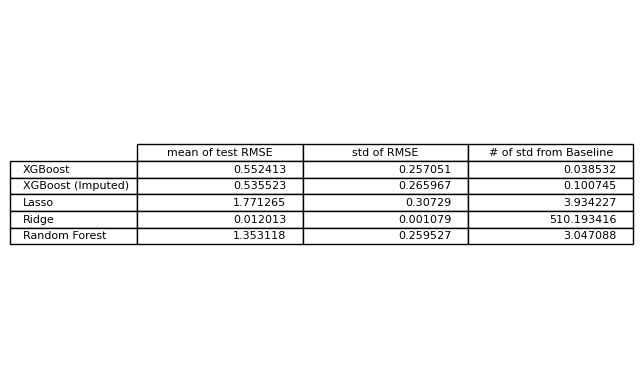

In [147]:
fig, ax =plt.subplots(1,1)
data=[[0.552413,0.257051,.038532],
      [.535523,0.265967,0.100745],
      [1.771265,0.307290,3.934227],
      [0.012013,0.001079,510.193416],
      [1.353118,0.259527,3.047088]]
column_labels=["mean of test RMSE", "std of RMSE", "# of std from Baseline"]
index_labels = ["XGBoost", "XGBoost (Imputed)", "Lasso", "Ridge", "Random Forest"]
ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,colLabels=column_labels,rowLabels=index_labels,loc="center")

In [144]:
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings("ignore")

result = permutation_importance(ridge_best_models[2], ridge_test_sets[2][0], ridge_test_sets[2][1], scoring='neg_root_mean_squared_error', random_state = 59)
importance = result.importances

test_scores = ridge_test_scores[2]

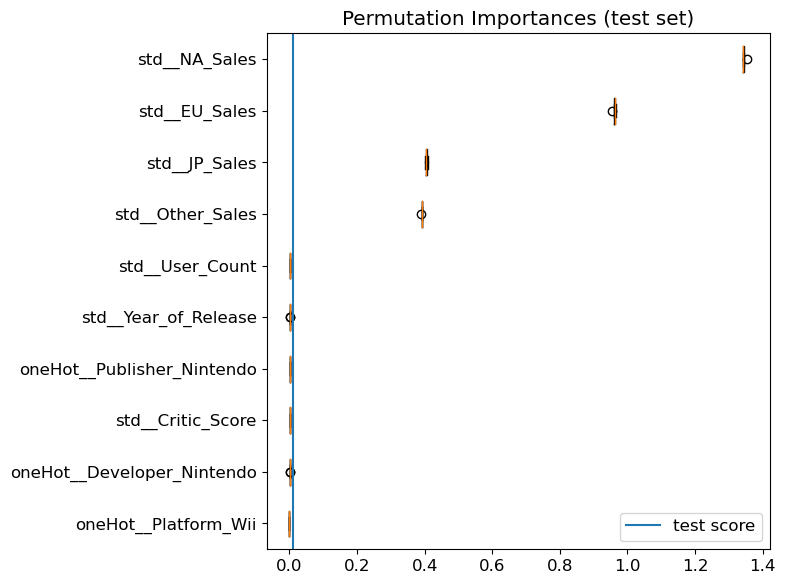

<Figure size 640x480 with 0 Axes>

In [153]:
sorted_indcs = np.argsort(np.mean(importance,axis=1))
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8.0,6.0))
plt.boxplot(importance[sorted_indcs[-10:]].T,labels=ridge_test_sets[2][0].columns[sorted_indcs[-10:]],vert=False)
plt.axvline(test_scores,label='test score')
plt.title("Permutation Importances (test set)")
plt.legend()
plt.tight_layout()
plt.show()

Permutation explainer: 3345it [01:31, 32.01it/s]                                


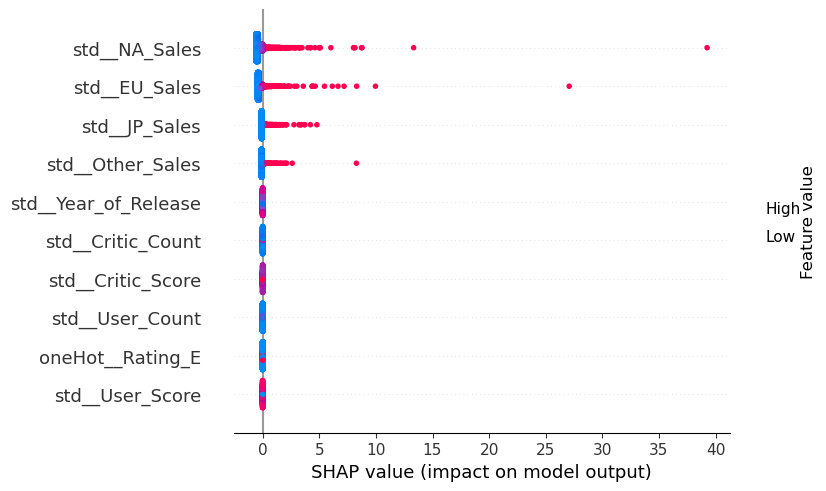

In [152]:
import shap

shap.initjs()

explainer = shap.Explainer(ridge_lin_reg.predict, ridge_test_sets[1][0])
shap_values = explainer(ridge_test_sets[1][0])

shap.summary_plot(shap_values, ridge_test_sets[1][0], max_display=10)